## Install all relevant libraries

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  # Ignore future warnings for cleaner output

#Data Handling & Visualization
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Static data visualization
import seaborn as sns  # Advanced statistical data visualization
import plotly.express as px  # Interactive data visualization
import numpy as np
import scipy.stats as stats

## Data Collection/ Acquisition

In [3]:
df = pd.read_csv(r"C:\Users\Arya\Downloads\archive (1)\MFGEmployees4.csv")

In [4]:
print(df.head()) #display the first five rows of the dataframe df

   EmployeeNumber    Surname GivenName Gender             City JobTitle  \
0               1  Gutierrez     Molly      F          Burnaby    Baker   
1               2   Hardwick   Stephen      M        Courtenay    Baker   
2               3    Delgado   Chester      M         Richmond    Baker   
3               4      Simon     Irene      F         Victoria    Baker   
4               5   Delvalle    Edward      M  New Westminster    Baker   

  DepartmentName    StoreLocation Division        Age  LengthService  \
0         Bakery          Burnaby   Stores  32.028816       6.018478   
1         Bakery          Nanaimo   Stores  40.320902       5.532445   
2         Bakery         Richmond   Stores  48.822047       4.389973   
3         Bakery         Victoria   Stores  44.599357       3.081736   
4         Bakery  New Westminster   Stores  35.697876       3.619091   

   AbsentHours BusinessUnit  
0    36.577306       Stores  
1    30.165072       Stores  
2    83.807798       Store

## Data preparation

In [5]:
df.shape #returns the dimensions of the dataframe df

(8336, 13)

In [6]:
df.info() #provides a summary of the dataframe,number of entries, column names and their data types, non-null counts and memory usage of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EmployeeNumber  8336 non-null   int64  
 1   Surname         8336 non-null   object 
 2   GivenName       8336 non-null   object 
 3   Gender          8336 non-null   object 
 4   City            8336 non-null   object 
 5   JobTitle        8336 non-null   object 
 6   DepartmentName  8336 non-null   object 
 7   StoreLocation   8336 non-null   object 
 8   Division        8336 non-null   object 
 9   Age             8336 non-null   float64
 10  LengthService   8336 non-null   float64
 11  AbsentHours     8336 non-null   float64
 12  BusinessUnit    8336 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 846.8+ KB


In [7]:
df.isnull().sum() #checks for missing values in each column of the dataframe df

EmployeeNumber    0
Surname           0
GivenName         0
Gender            0
City              0
JobTitle          0
DepartmentName    0
StoreLocation     0
Division          0
Age               0
LengthService     0
AbsentHours       0
BusinessUnit      0
dtype: int64

In [8]:
df.duplicated().sum() #checks for duplicate rows in the dataframe df

0

## EDA and Visualization of the dataset

In [9]:
print(df.describe())# Get summary statistics for numerical columns

       EmployeeNumber          Age  LengthService  AbsentHours
count     8336.000000  8336.000000    8336.000000  8336.000000
mean      4168.500000    42.007086       4.782910    61.283978
std       2406.540255     9.939798       2.462990    49.038365
min          1.000000     3.504743       0.012098     0.000000
25%       2084.750000    35.298748       3.575892    19.127590
50%       4168.500000    42.114924       4.600248    56.005808
75%       6252.250000    48.666943       5.623922    94.284692
max       8336.000000    77.938003      43.735239   272.530123


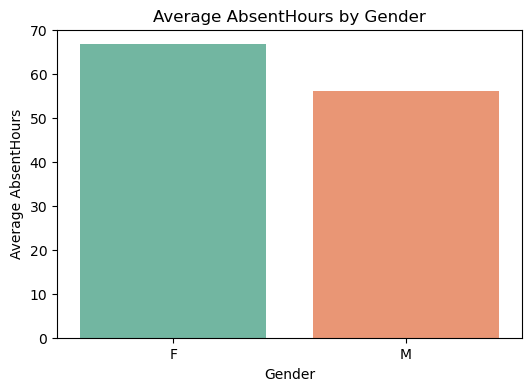

In [10]:
# Group data by Gender and sum (or average) AbsentHours
absenteeism_by_gender = df.groupby("Gender")["AbsentHours"].mean().reset_index()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(data=absenteeism_by_gender, x="Gender", y="AbsentHours", palette="Set2")

plt.title("Average AbsentHours by Gender")
plt.xlabel("Gender")
plt.ylabel("Average AbsentHours")
plt.show()

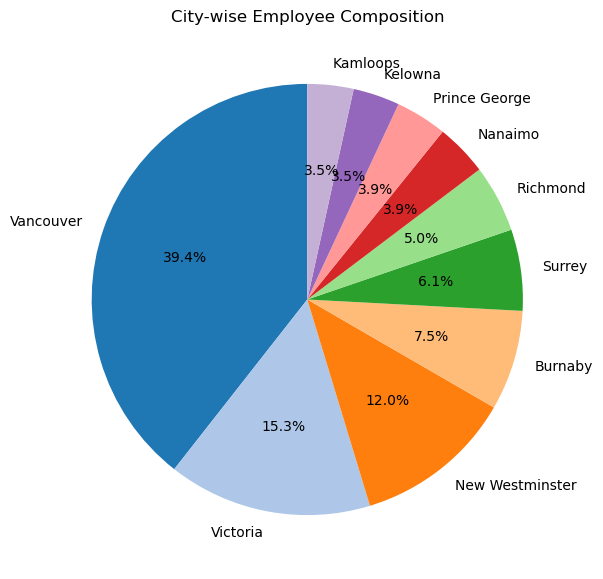

In [11]:
# Count population by city
city_counts = df["City"].value_counts().head(10)   # top 10 cities (optional, remove .head(10) if you want all)

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(city_counts, labels=city_counts.index, autopct="%1.1f%%", startangle=90, colors=plt.cm.tab20.colors)
plt.title("City-wise Employee Composition")
plt.show()

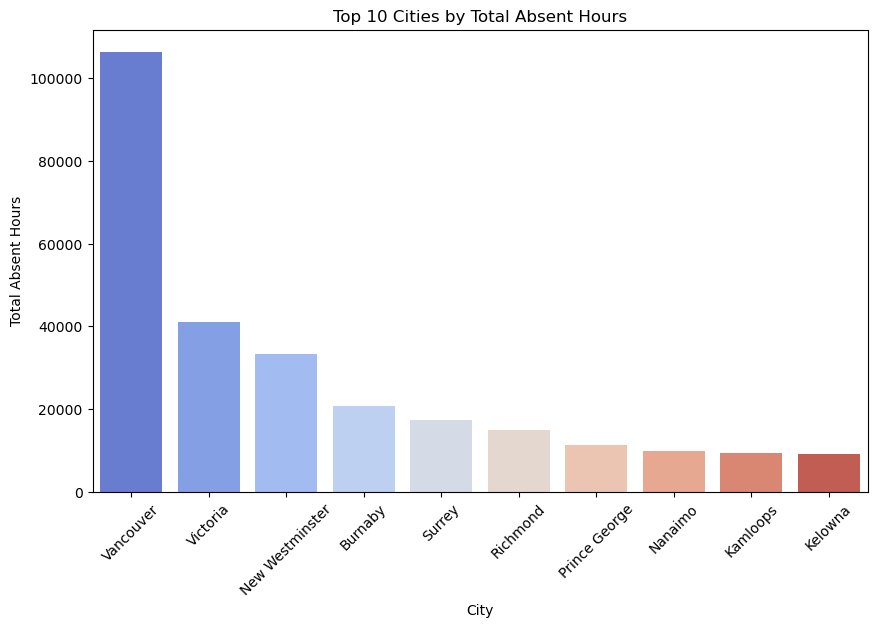

In [12]:
# Aggregate absent hours by city
city_absent = df.groupby("City")["AbsentHours"].sum().reset_index()

# Get top 10 cities
top10_cities = city_absent.sort_values(by="AbsentHours", ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top10_cities, x="City", y="AbsentHours", palette="coolwarm")

plt.title("Top 10 Cities by Total Absent Hours")
plt.xlabel("City")
plt.ylabel("Total Absent Hours")
plt.xticks(rotation=45)
plt.show()

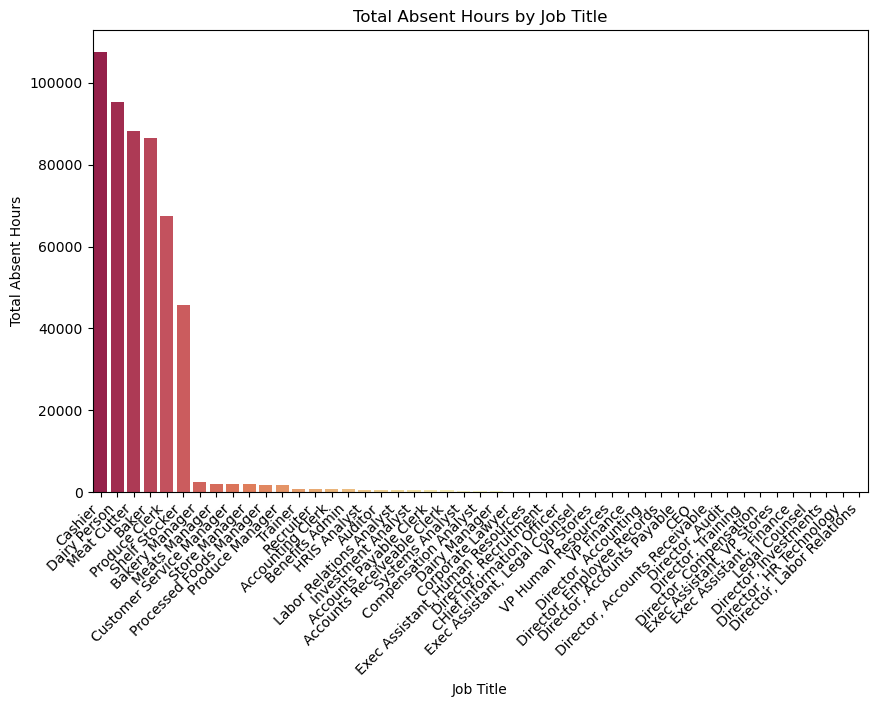

In [13]:
# --- Total absent hours by job title ---
job_absent = df.groupby("JobTitle")["AbsentHours"].sum().reset_index()

# Sort by highest absent hours
job_absent = job_absent.sort_values(by="AbsentHours", ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=job_absent, x="JobTitle", y="AbsentHours", palette="Spectral")

plt.title("Total Absent Hours by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Total Absent Hours")
plt.xticks(rotation=45, ha="right")
plt.show()

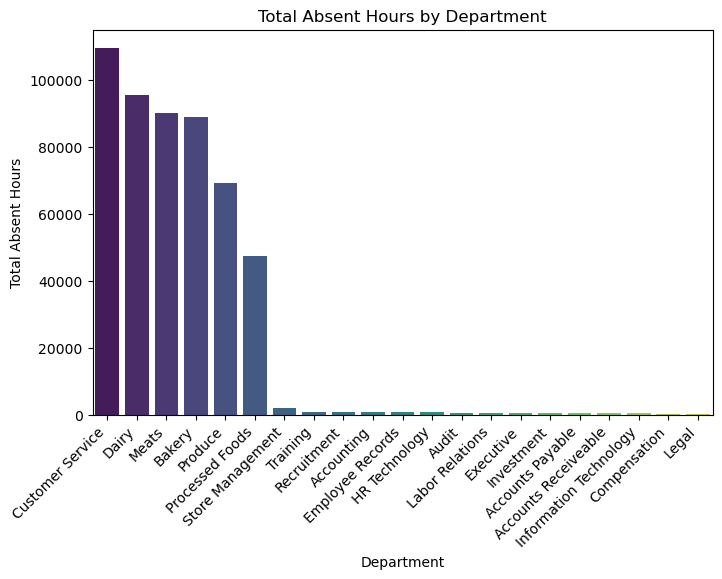

In [14]:
# --- Total absent hours by department ---
dept_absent = df.groupby("DepartmentName")["AbsentHours"].sum().reset_index()

# Sort by highest absent hours
dept_absent = dept_absent.sort_values(by="AbsentHours", ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=dept_absent, x="DepartmentName", y="AbsentHours", palette="viridis")

plt.title("Total Absent Hours by Department")
plt.xlabel("Department")
plt.ylabel("Total Absent Hours")
plt.xticks(rotation=45, ha="right")
plt.show()

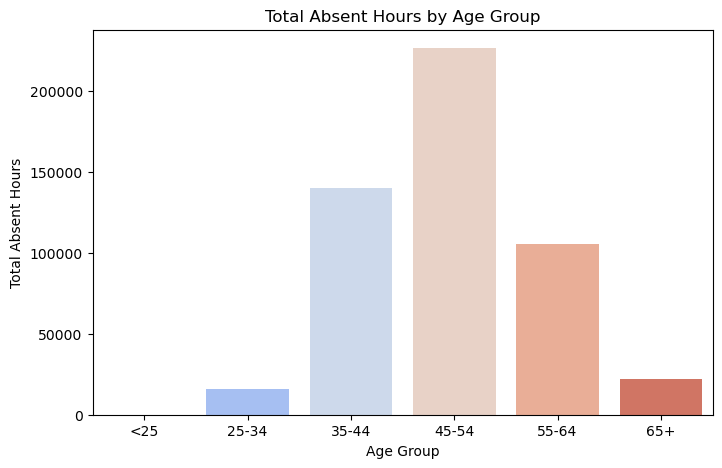

In [15]:
# Define age bins
bins = [0, 24, 34, 44, 54, 64, 100]
labels = ["<25", "25-34", "35-44", "45-54", "55-64", "65+"]

# Create Age Groups
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

# Aggregate absent hours by age group
age_absent = df.groupby("AgeGroup")["AbsentHours"].sum().reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=age_absent, x="AgeGroup", y="AbsentHours", palette="coolwarm")

plt.title("Total Absent Hours by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Absent Hours")
plt.show()

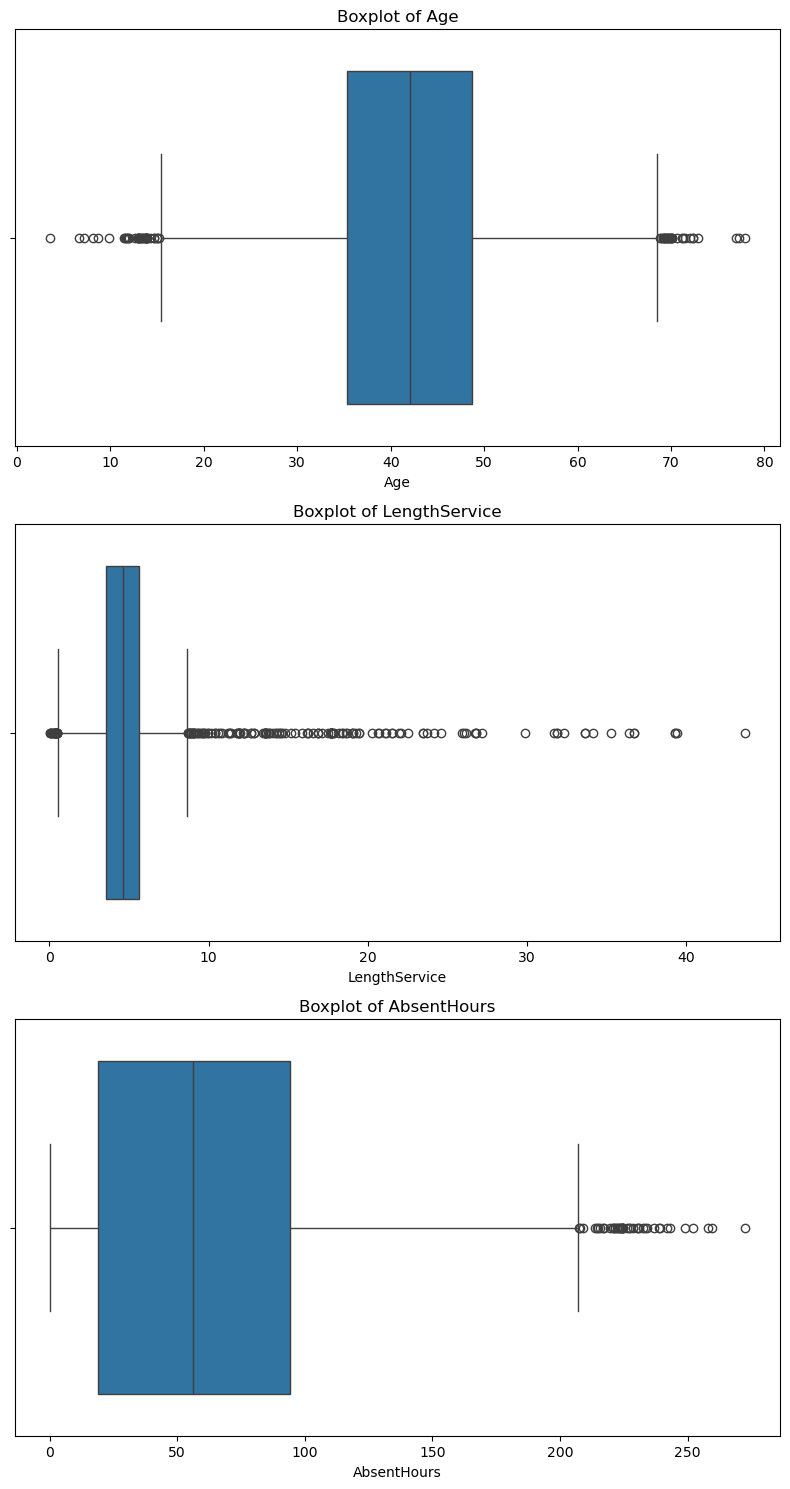

In [16]:
# Columns to plot
cols = ['Age', 'LengthService', 'AbsentHours']

# Number of columns
n_cols = len(cols)

# Create subplots
fig, axes = plt.subplots(nrows=n_cols, ncols=1, figsize=(8, 5*n_cols))

# Plot each column in its own boxplot
for i, col in enumerate(cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [17]:
# Columns to check for outliers
cols = ['Age', 'LengthService', 'AbsentHours']

# Copy the dataframe to avoid changing the original
df_clean = df.copy()

for col in cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Keep only rows within bounds
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# Check new shape
print(f"Original dataframe shape: {df.shape}")
print(f"Dataframe after removing outliers: {df_clean.shape}")

Original dataframe shape: (8336, 14)
Dataframe after removing outliers: (8072, 14)


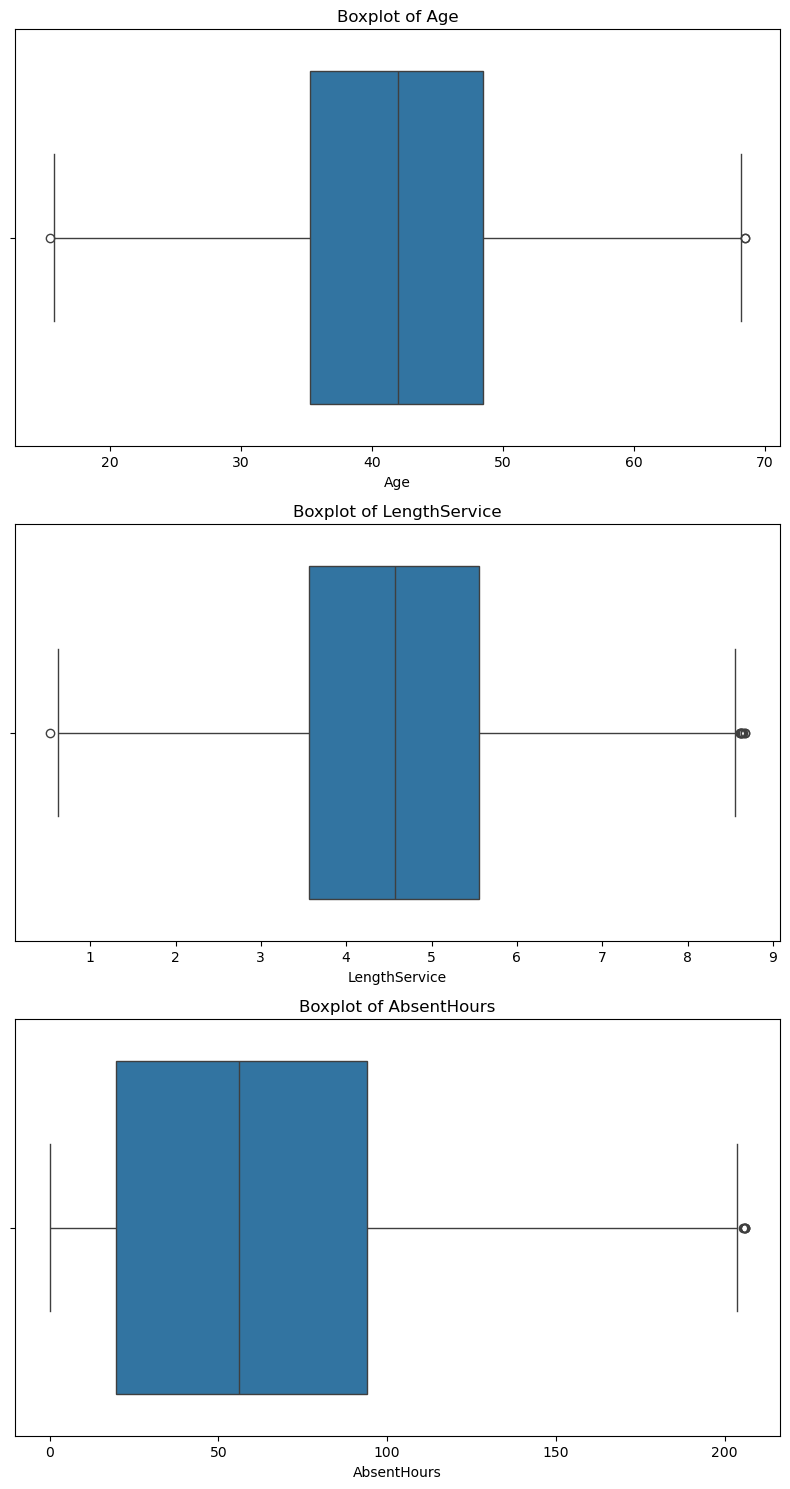

In [18]:
# Columns to plot
cols = ['Age', 'LengthService', 'AbsentHours']

# Number of columns
n_cols = len(cols)

# Create subplots
fig, axes = plt.subplots(nrows=n_cols, ncols=1, figsize=(8, 5*n_cols))

# Plot each column in its own boxplot
for i, col in enumerate(cols):
    sns.boxplot(x=df_clean[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [19]:
print(df.columns.tolist())

['EmployeeNumber', 'Surname', 'GivenName', 'Gender', 'City', 'JobTitle', 'DepartmentName', 'StoreLocation', 'Division', 'Age', 'LengthService', 'AbsentHours', 'BusinessUnit', 'AgeGroup']


## Converting categorical values and additional EDA

In [20]:
df_clean["Gender"].unique() #returns the unique values in the "gender" column of the dataframe df

array(['F', 'M'], dtype=object)

In [21]:
# Map values
df_clean["Gender"] = df_clean["Gender"].map({"M": 1, "F": 0})

# Convert the column explicitly to numeric
df_clean["Gender"] = pd.to_numeric(df_clean["Gender"], errors='coerce')

# Check unique values and type
print(df_clean["Gender"].unique())
print(df_clean["Gender"].dtype)

[0 1]
int64


<Axes: xlabel='Age', ylabel='AbsentHours'>

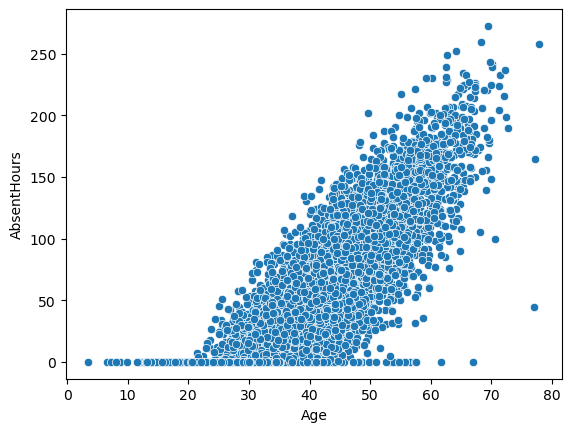

In [22]:
sns.scatterplot(x='Age', y='AbsentHours', data=df)

In [23]:
df_clean["JobTitle"].unique()

array(['Baker', 'Accounting Clerk', 'Accounts Payable Clerk',
       'Accounts Receiveable Clerk', 'Auditor', 'Bakery Manager',
       'Cashier', 'Benefits Admin', 'HRIS Analyst', 'Investment Analyst',
       'Labor Relations Analyst', 'Recruiter', 'Dairy Person',
       'Systems Analyst', 'Trainer', 'Meat Cutter', 'VP Human Resources',
       'VP Finance', 'Exec Assistant, Legal Counsel', 'Store Manager',
       'Meats Manager', 'Exec Assistant, Human Resources',
       'Exec Assistant, Finance', 'Director, Recruitment',
       'Corporate Lawyer', 'Produce Manager',
       'Director, Accounts Payable', 'Director, Accounting',
       'Director, Investments', 'Processed Foods Manager',
       'Customer Service Manager', 'Dairy Manager', 'Produce Clerk',
       'Shelf Stocker'], dtype=object)

In [24]:
# Create a dictionary for cleaning/standardizing titles
title_cleaning = {
    "Accounts Receiveable Clerk": "Accounts Receivable Clerk",
    "Benefits Admin": "Benefits Administrator",
    "Dairy Person": "Dairy Associate",
    "VP Human Resources": "Vice President, Human Resources",
    "VP Finance": "Vice President, Finance",
    "Exec Assistant, Legal Counsel": "Executive Assistant, Legal Counsel",
    "Exec Assistant, Human Resources": "Executive Assistant, Human Resources",
    "Exec Assistant, Finance": "Executive Assistant, Finance"
}

# Apply the cleaning (replace only if the job title is in the dictionary)
df_clean["JobTitle"] = df_clean["JobTitle"].replace(title_cleaning)

# Check the unique cleaned job titles
print(df_clean["JobTitle"].unique())

['Baker' 'Accounting Clerk' 'Accounts Payable Clerk'
 'Accounts Receivable Clerk' 'Auditor' 'Bakery Manager' 'Cashier'
 'Benefits Administrator' 'HRIS Analyst' 'Investment Analyst'
 'Labor Relations Analyst' 'Recruiter' 'Dairy Associate' 'Systems Analyst'
 'Trainer' 'Meat Cutter' 'Vice President, Human Resources'
 'Vice President, Finance' 'Executive Assistant, Legal Counsel'
 'Store Manager' 'Meats Manager' 'Executive Assistant, Human Resources'
 'Executive Assistant, Finance' 'Director, Recruitment' 'Corporate Lawyer'
 'Produce Manager' 'Director, Accounts Payable' 'Director, Accounting'
 'Director, Investments' 'Processed Foods Manager'
 'Customer Service Manager' 'Dairy Manager' 'Produce Clerk'
 'Shelf Stocker']


In [25]:
job_title_mapping = {
# Human Resources
"Benefits Administrator": "Human Resources",
"HRIS Analyst": "Human Resources",
"Labor Relations Analyst": "Human Resources",
"Recruiter": "Human Resources",
"Vice President, Human Resources": "Human Resources",
"Executive Assistant, Human Resources": "Human Resources",
"Director, Recruitment": "Human Resources",
"Trainer": "Human Resources",

# Finance & Accounting
"Accounting Clerk": "Finance & Accounting",
"Accounts Payable Clerk": "Finance & Accounting",
"Accounts Receivable Clerk": "Finance & Accounting",
"Auditor": "Finance & Accounting",
"Investment Analyst": "Finance & Accounting",
"Vice President, Finance": "Finance & Accounting",
"Executive Assistant, Finance": "Finance & Accounting",
"Director, Accounts Payable": "Finance & Accounting",
"Director, Accounting": "Finance & Accounting",
"Director, Investments": "Finance & Accounting",

# Legal
"Corporate Lawyer": "Legal",
"Executive Assistant, Legal Counsel": "Legal",

# Store & Retail Operations
"Store Manager": "Store & Retail Operations",
"Customer Service Manager": "Store & Retail Operations",
"Shelf Stocker": "Store & Retail Operations",
"Cashier": "Store & Retail Operations",

# Food & Production
"Baker": "Food & Production",
"Bakery Manager": "Food & Production",
"Dairy Associate": "Food & Production",
"Dairy Manager": "Food & Production",
"Produce Clerk": "Food & Production",
"Produce Manager": "Food & Production",
"Meat Cutter": "Food & Production",
"Meats Manager": "Food & Production",
"Processed Foods Manager": "Food & Production",

# Technology & Systems
"Systems Analyst": "Technology & Systems"

}


In [26]:
# Map job titles to categories 
df_clean["JobCategory"] = df_clean["JobTitle"].map(job_title_mapping)

# Map categories to numeric codes
category_mapping = {
    "Human Resources": 1,
    "Finance & Accounting": 2,
    "Legal": 3,
    "Store & Retail Operations": 4,
    "Food & Production": 5,
    "Technology & Systems": 6
}
df_clean["JobCategoryCode"] = df_clean["JobCategory"].map(category_mapping)

# Ensure the column is numeric
df_clean["JobCategoryCode"] = pd.to_numeric(df_clean["JobCategoryCode"], errors='coerce')

# Check results
print(df_clean[["JobTitle", "JobCategory", "JobCategoryCode"]].tail())
print(df_clean["JobCategoryCode"].dtype)


             JobTitle                JobCategory  JobCategoryCode
8331          Cashier  Store & Retail Operations                4
8332          Cashier  Store & Retail Operations                4
8333          Cashier  Store & Retail Operations                4
8334  Dairy Associate          Food & Production                5
8335  Dairy Associate          Food & Production                5
int64


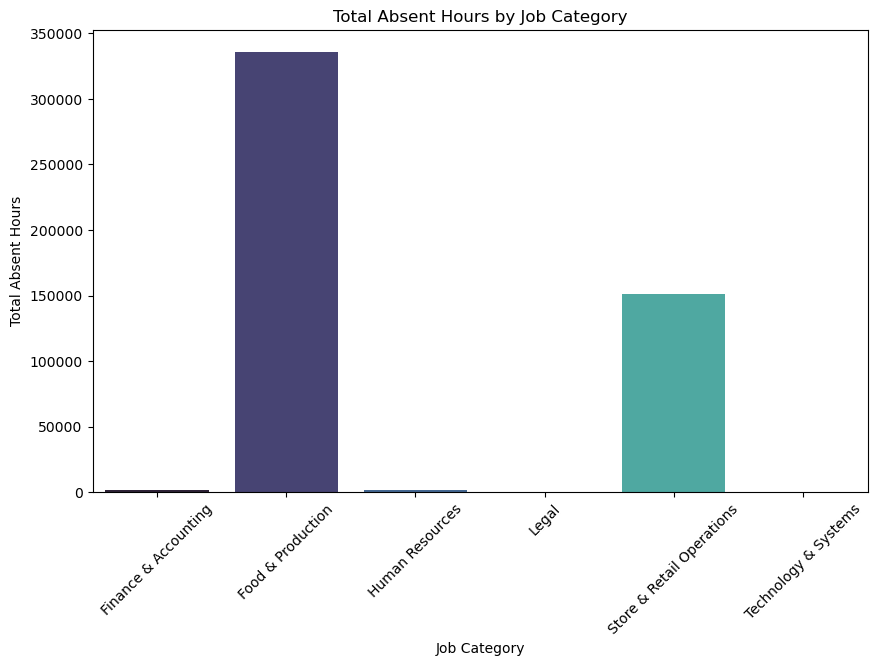

In [27]:
plt.figure(figsize=(10,6))
job_absence = df_clean.groupby("JobCategory")["AbsentHours"].sum().reset_index()
sns.barplot(x="JobCategory", y="AbsentHours", data=job_absence, palette="mako")
plt.title("Total Absent Hours by Job Category")
plt.ylabel("Total Absent Hours")
plt.xlabel("Job Category")
plt.xticks(rotation=45)
plt.show()

In [28]:
df_clean["DepartmentName"].unique()

array(['Bakery', 'Accounting', 'Accounts Payable', 'Accounts Receiveable',
       'Audit', 'Customer Service', 'Employee Records', 'HR Technology',
       'Investment', 'Labor Relations', 'Recruitment', 'Dairy',
       'Information Technology', 'Training', 'Meats', 'Executive',
       'Store Management', 'Legal', 'Produce', 'Processed Foods'],
      dtype=object)

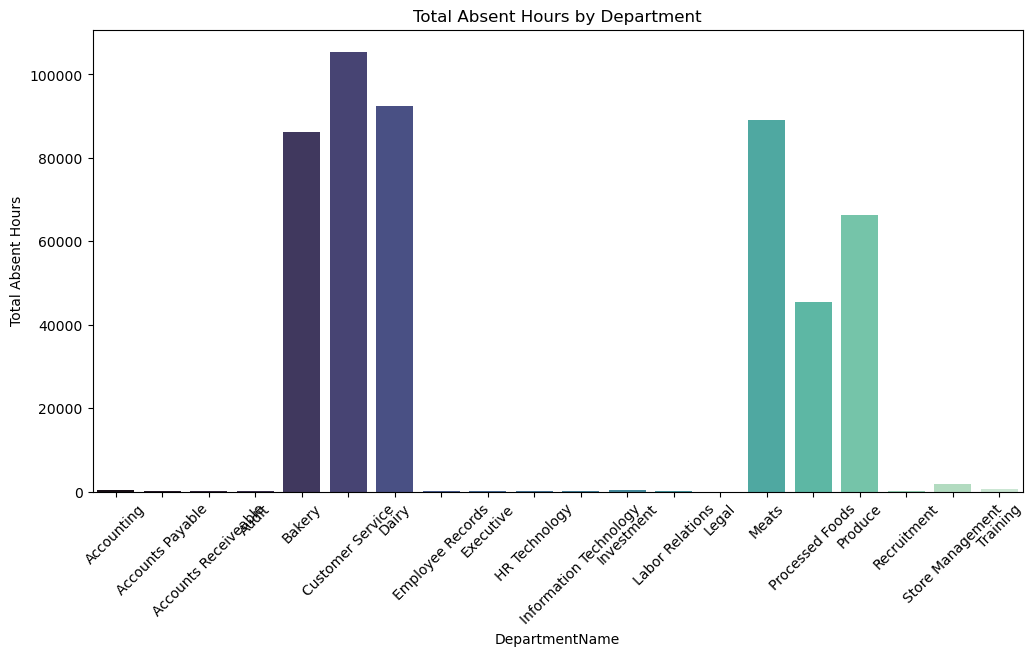

In [29]:
dept_absence = df_clean.groupby("DepartmentName")["AbsentHours"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x="DepartmentName", y="AbsentHours", data=dept_absence, palette="mako")
plt.title("Total Absent Hours by Department")
plt.xticks(rotation=45)
plt.ylabel("Total Absent Hours")
plt.show()

In [30]:
df_clean["StoreLocation"].unique() 

array(['Burnaby', 'Nanaimo', 'Richmond', 'Victoria', 'New Westminster',
       'West Vancouver', 'North Vancouver', 'Vancouver', 'Aldergrove',
       'Kelowna', 'Trail', 'Quesnel', 'Cranbrook', 'Kamloops',
       'Abbotsford', 'Dawson Creek', 'Surrey', 'Squamish', 'Terrace',
       'Chilliwack', 'Prince George', 'New Westminister', 'Vernon',
       'Nelson', 'Fort St John', 'Williams Lake', 'Ocean Falls',
       'Port Coquitlam', 'White Rock', 'Langley', 'Haney', 'Princeton',
       'Fort Nelson', 'Valemount', 'Pitt Meadows', 'Bella Bella',
       'Cortes Island', 'Grand Forks', 'Dease Lake', 'Blue River'],
      dtype=object)

In [31]:
store_locations_clean = [
    'Burnaby', 'Nanaimo', 'Richmond', 'Victoria', 'New Westminster',
    'West Vancouver', 'North Vancouver', 'Vancouver', 'Aldergrove',
    'Kelowna', 'Trail', 'Quesnel', 'Cranbrook', 'Kamloops',
    'Abbotsford', 'Dawson Creek', 'Surrey', 'Squamish', 'Terrace',
    'Chilliwack', 'Prince George', 'Vernon', 'Nelson', 'Fort St John',
    'Williams Lake', 'Ocean Falls', 'Port Coquitlam', 'White Rock',
    'Langley', 'Haney', 'Princeton', 'Fort Nelson', 'Valemount',
    'Pitt Meadows', 'Bella Bella', 'Cortes Island', 'Grand Forks',
    'Dease Lake', 'Blue River'
]


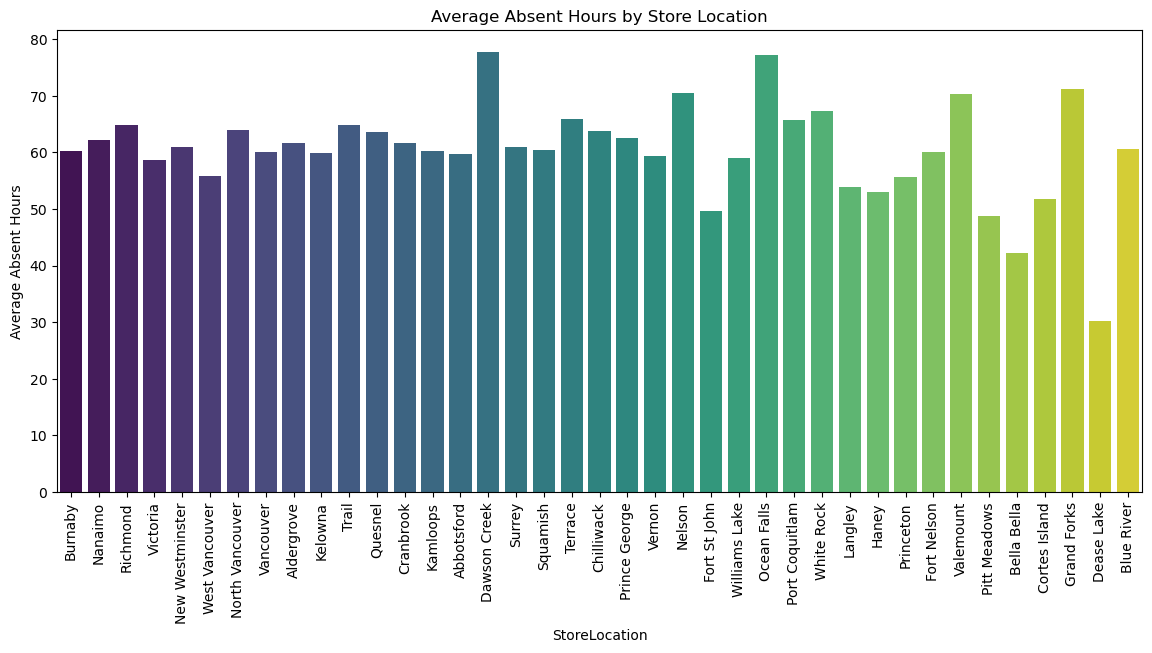

In [32]:
plt.figure(figsize=(14,6))
sns.barplot(x="StoreLocation", y="AbsentHours", data=df_clean, 
            order=store_locations_clean, estimator="mean", ci=None, palette="viridis")
plt.title("Average Absent Hours by Store Location")
plt.xticks(rotation=90)
plt.ylabel("Average Absent Hours")
plt.show()


In [33]:
df_clean["Division"].unique()

array(['Stores', 'FinanceAndAccounting', 'HumanResources', 'InfoTech',
       'Executive', 'Legal'], dtype=object)

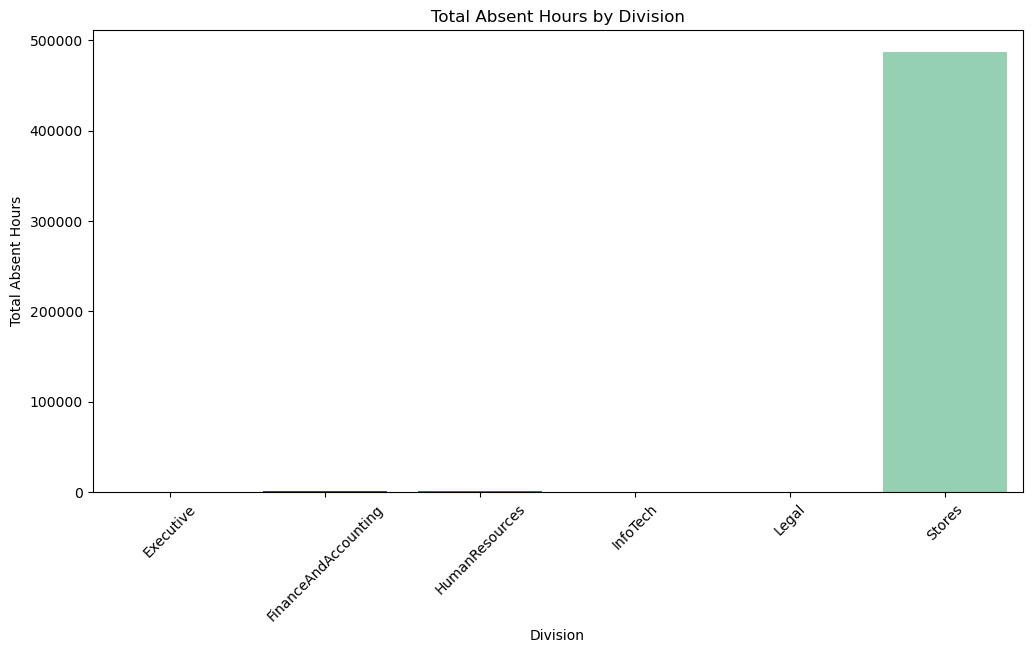

In [34]:
dept_absence = df_clean.groupby("Division")["AbsentHours"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x="Division", y="AbsentHours", data=dept_absence, palette="mako")
plt.title("Total Absent Hours by Division")
plt.xticks(rotation=45)
plt.ylabel("Total Absent Hours")
plt.show()

In [35]:
df_clean["BusinessUnit"].unique() 

array(['Stores', 'HeadOffice'], dtype=object)

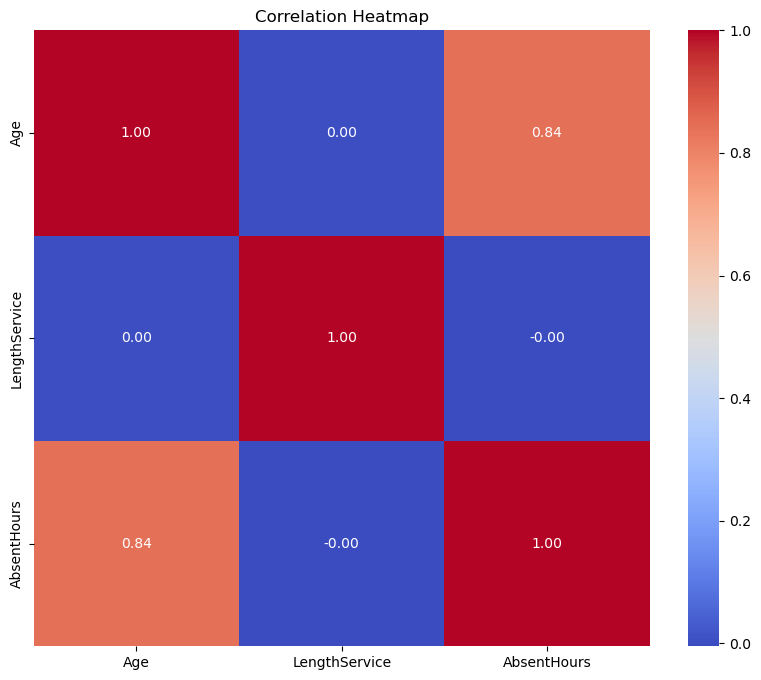

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric columns for correlation
numeric_cols = [
    
    "Age", "LengthService", "AbsentHours"
]

# Compute correlation matrix
corr_matrix = df_clean[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()


#### Note: We observe a very strong positive correlation between age and absent hours. Meaning when age increases, absent hours tend to increase in our dataset.

<Axes: xlabel='LengthService', ylabel='AbsentHours'>

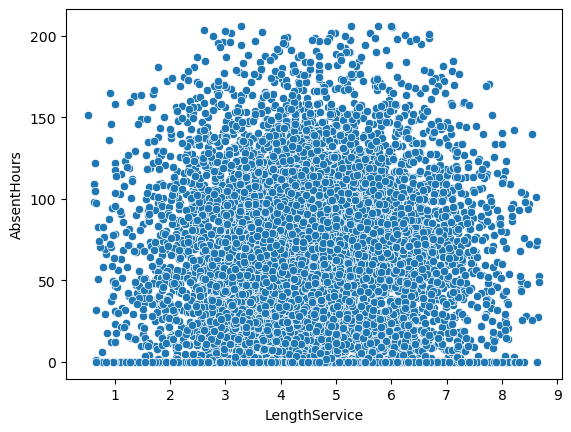

In [37]:
sns.scatterplot(x="LengthService", y="AbsentHours", data=df_clean)

#### Note: No relationship is seen between length service and absent hours

In [38]:
# Categorical columns to test
categorical_vars = ["Gender", "Division", "DepartmentName", "StoreLocation", "JobTitle", "BusinessUnit", "City"]

results = {}

for var in categorical_vars:
    groups = [group["AbsentHours"].dropna().values for name, group in df_clean.groupby(var)]
    
    # If binary -> independent t-test
    if len(groups) == 2:
        t_stat, p_val = stats.ttest_ind(groups[0], groups[1], equal_var=False)
        results[var] = {"test": "t-test", "t-stat": t_stat, "p-value": p_val}
    
    # If more than 2 groups -> ANOVA
    elif len(groups) > 2:
        f_stat, p_val = stats.f_oneway(*groups)
        results[var] = {"test": "ANOVA", "F-stat": f_stat, "p-value": p_val}
    
    else:
        results[var] = {"test": "N/A", "note": "Only one category present"}

# Display results neatly
results_df = pd.DataFrame(results).T
print(results_df)


                  test    t-stat   p-value    F-stat
Gender          t-test  8.747534       0.0       NaN
Division         ANOVA       NaN  0.358176   1.09975
DepartmentName   ANOVA       NaN  0.260949  1.183643
StoreLocation    ANOVA       NaN  0.452201  1.010282
JobTitle         ANOVA       NaN  0.209051  1.190908
BusinessUnit    t-test  0.781766  0.437987       NaN
City             ANOVA       NaN  0.798192  0.922385


#### Note: Absenteeism differs substantially by gender. One gender group takes more absent hours on average.
#### Absenteeism does not differ meaningfully between divisions.
#### No strong evidence that absenteeism differs across departments.
#### Absenteeism levels look similar across Stores, Job Titles, Business Units, Cities .

In [40]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df_clean["AbsentHours"], groups=df_clean["Gender"], alpha=0.05)
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -9.1899   0.0 -11.246 -7.1337   True
---------------------------------------------------
